In [1]:
import tensorflow as tf
import os
gpus= tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
#using my GPU to do the Task
tf.device('/device:GPU:1')

Found 593 files belonging to 2 classes.
Using 475 files for training.
Epoch 1/20
10/10 [==============================] - 16s 1s/step - loss: 15.3244 - accuracy: 0.6875 - val_loss: 2.3842 - val_accuracy: 0.6016
Epoch 2/20
10/10 [==============================] - 15s 1s/step - loss: 8.6818 - accuracy: 0.7625 - val_loss: 20.4587 - val_accuracy: 0.4844
Epoch 3/20
10/10 [==============================] - 16s 2s/step - loss: 4.8349 - accuracy: 0.8156 - val_loss: 20.4690 - val_accuracy: 0.4922
Epoch 4/20
10/10 [==============================] - 15s 1s/step - loss: 4.8175 - accuracy: 0.8250 - val_loss: 18.9050 - val_accuracy: 0.4609


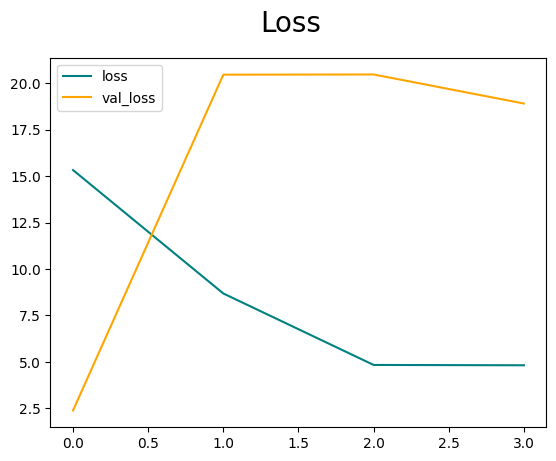

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout,BatchNormalization
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
data_directory = "D:/data"
data = tf.keras.utils.image_dataset_from_directory(data_directory, validation_split=0.2, subset='training', seed=42)

# Data normalization using a preprocessing layer
normalized_data = data.map(lambda x, y: (x / 255, y))

# Split the data into training, validation, and test sets
train_size = int(len(normalized_data) * 0.7)
val_size = int(len(normalized_data) * 0.2) + 1
test_size = int(len(normalized_data) * 0.1) + 1

train = normalized_data.take(train_size)
val = normalized_data.skip(train_size).take(val_size)
test = normalized_data.skip(train_size + val_size).take(test_size)


# Build a deeper CNN model
model = Sequential([
    Conv2D(32, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    
    Conv2D(64, (3, 3), strides=1, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    
    Conv2D(128, (3, 3), strides=1, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(train, epochs=20, validation_data=val, callbacks=[early_stopping])

# Plot training history
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Evaluate the model on the test set
y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    X, y = batch
    y_true.extend(y)
    y_pred.extend(model.predict(X).flatten())

# Convert probabilities to binary predictions
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)

# Calculate and print metrics
test_accuracy = accuracy_score(y_true, y_pred_binary)
test_precision = precision_score(y_true, y_pred_binary)
test_recall = recall_score(y_true, y_pred_binary)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')

1/1 [==============================] - 0s 41ms/step
Test Accuracy: 0.6666666666666666
Test Precision: 0.625
Test Recall: 1.0


In [16]:
import cv2
img=cv2.imread('C:/Users/vikra/Downloads/sadtest.jpg')

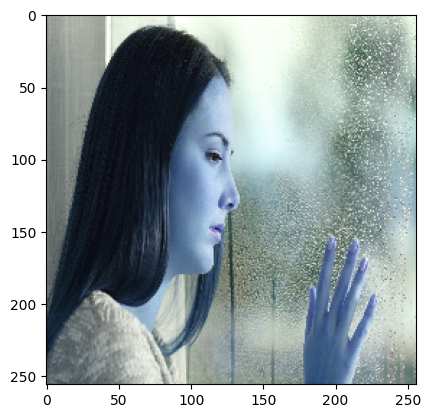

In [17]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [18]:
import numpy as np
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 29ms/step


In [19]:
yhat

array([[0.9922794]], dtype=float32)